# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2024-07-20 14:57:22.104167: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-20 14:57:22.287069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 14:57:22.287100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 14:57:22.313839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-20 14:57:22.374084: I tensorflow/core/platform/cpu_feature_guar

2.15.1


## Creating data to view and fit

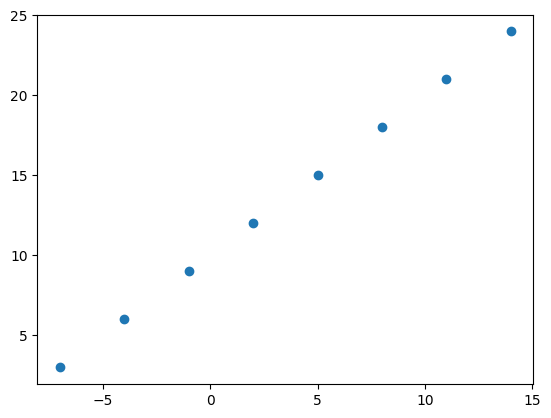

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2024-07-20 14:57:25.380548: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-20 14:57:25.414550: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-20 14:57:25.414577: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-20 14:57:25.416968: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-20 14:57:25.416986: I external/local_xla/xla/stream_executor

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [7]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)       
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 8.3228 - mae: 8.3228
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 8.1903 - mae: 8.1903
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 8.0578 - mae: 8.0578
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 7.9253 - mae: 7.9253
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 7.7928 - mae: 7.7928


2024-07-20 14:57:26.976882: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5316936560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-20 14:57:26.976911: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-20 14:57:26.992036: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1721487447.016223     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [8]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
# Try and make a prediciton using our model
model.predict([17.0])

1/1 [==============================] - 0s 57ms/step


array([[28.171299]], dtype=float32)

### Improving our model

We can imporve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer. 
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function. 
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [10]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)           
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 162ms/step - loss: 7.7489 - mae: 7.7489
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6164 - mae: 7.6164
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4738 - mae: 7.4738
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4681 - mae: 7.4681
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4625 - mae: 7.4625
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4569 - mae: 7.4569
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4513 - mae: 7.4513
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4456 - mae: 7.4456
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.440

In [11]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Let's see if our model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 32ms/step


array([[29.878962]], dtype=float32)

In [13]:
# Let's see if we can make another change to improve the model

# 1. Create the model (this time with an extra hidden layer with 100 hidden neurons)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 279ms/step - loss: 14.0359 - mae: 14.0359
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4584 - mae: 13.4584
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8887 - mae: 12.8887
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3215 - mae: 12.3215
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7565 - mae: 11.7565
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1821 - mae: 11.1821
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5923 - mae: 10.5923
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9840 - mae: 9.9840
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.3522 - mae: 9.3522
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6878 - mae: 8.6878
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [14]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
model.predict([17.])

1/1 [==============================] - 0s 38ms/step


array([[31.630016]], dtype=float32)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 399ms/step - loss: 12.9089 - mae: 12.9089
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1964 - mae: 12.1964
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4830 - mae: 11.4830
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7667 - mae: 10.7667
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0454 - mae: 10.0454
Epoch 6/100


2024-07-20 14:57:29.642872: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 [==============================] - 0s 7ms/step - loss: 9.3174 - mae: 9.3174
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5803 - mae: 8.5803
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8313 - mae: 7.8313
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0675 - mae: 7.0675
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.7983 - mae: 6.7983
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.1333 - mae: 7.1333
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4166 - mae: 7.4166
Epoch 13/100
1/1 [==============================] - 0s 5ms/step - loss: 7.7471 - mae: 7.7471
Epoch 14/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8332 - mae: 7.8332
Epoch 15/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7213 - mae: 7.7213
Epoch 16/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4619 - mae: 

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 39ms/step


array([[26.621065]], dtype=float32)

### Evaluating a model

```
Build a model -> fit it -> evaluate -> tweak a model -> fit it -> evaluate it -> tweak a model ...

When it comes to evaluation... there are 3 words you should memorize:

> "visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

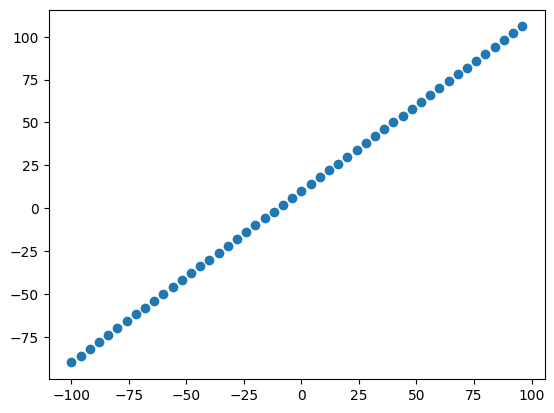

In [20]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets... 

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model tets tuned on this data, which is typically 10-15% f the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [21]:
# Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data into training and test sets, lets visualize it.

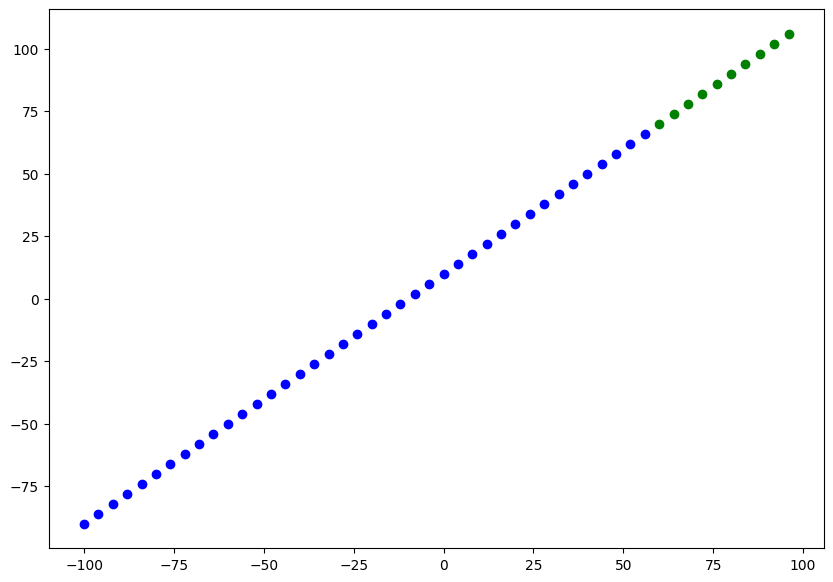

In [23]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot the test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')

In [24]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y, epochs=100)

In [25]:
# Let's create a model which builds automatically by defining the input_shape argument int he first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), 
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])


In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10403 (40.64 KB)
Trainable params: 10403 (40.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

In [27]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [28]:
# Get a summary of our model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10403 (40.64 KB)
Trainable params: 10403 (40.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


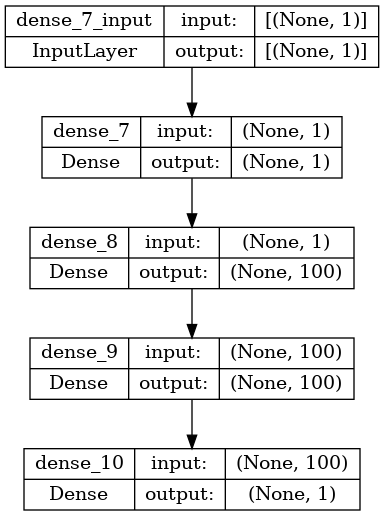

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs. `y_pred` (ground truth vs. your model predictions)

In [30]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 37ms/step


array([[ 72.493576],
       [ 77.210335],
       [ 81.92709 ],
       [ 86.64386 ],
       [ 91.36061 ],
       [ 96.07737 ],
       [100.79414 ],
       [105.510895],
       [110.22765 ],
       [114.94441 ]], dtype=float32)

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """
    Plots training data, and compares predictions to ground truth labels. 
    """
    
    plt.figure(figsize=(10, 7))
    # Plot trainnig data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Test data')
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show the legend
    plt.legend()

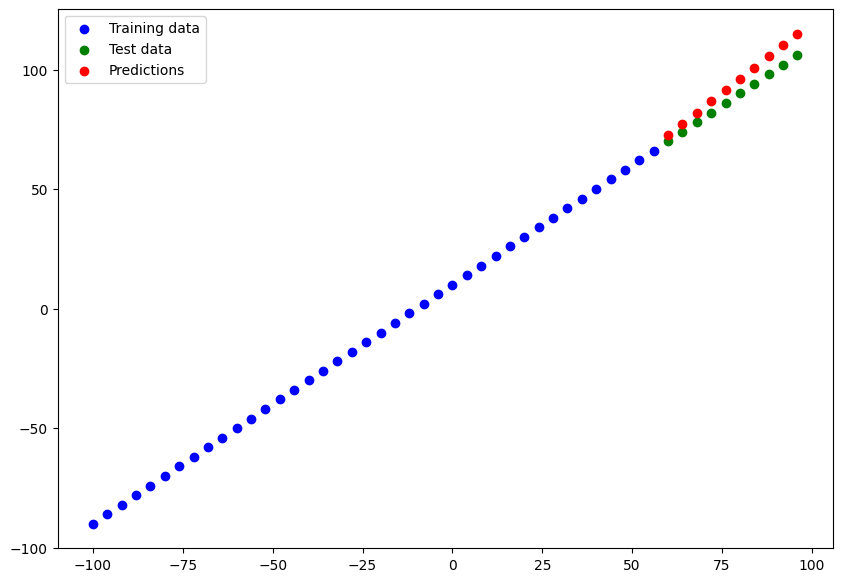

In [33]:
plot_predictions()

### Evaluating our model's predictions with with regression evaluation metrics

Depending on the problem that you're working on, there iwll be different evaluation metrics to evaluate your model's performance. 

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "one average, how wrong is each of my model's predictions?"
* MSE - mean squared error, "square the average errors"

In [34]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 71ms/step - loss: 5.7190 - mae: 5.7190


[5.718995094299316, 5.718995094299316]

In [35]:
# Calculate the mean absolute error --- wrong shapes, not accurate
tf.metrics.mean_absolute_error(y_test, y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.005138, 12.873799, 10.829163, 10.      , 10.272122, 11.630948,
       14.076487, 17.608715, 22.227654, 26.944412], dtype=float32)>

In [36]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.493576,  77.210335,  81.92709 ,  86.64386 ,  91.36061 ,
        96.07737 , 100.79414 , 105.510895, 110.22765 , 114.94441 ],
      dtype=float32)>

In [37]:
# Calculate the correct mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.718995>

In [38]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=36.945293>

In [39]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))



### Running experiments to improve our model

How to improve model:
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels). 
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs. 
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build model_1**

In [40]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model 
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 69.6135 - mae: 69.6135
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 34.4102 - mae: 34.4102
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1098 - mae: 9.1098
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0927 - mae: 11.0927
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.2684 - mae: 12.2684
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4942 - mae: 9.4942
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6264 - mae: 8.6264
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0670 - mae: 9.0670
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.8564 - mae: 18.8564
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1860 - mae: 10.1860
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 23ms/step


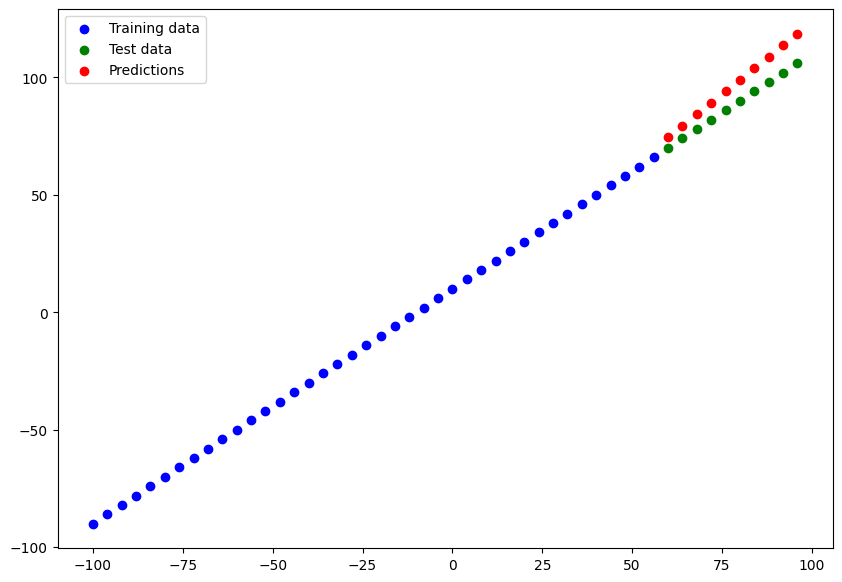

In [41]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [42]:
# Calculate model_1 evaluattion metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.557459>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.70806>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [43]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 38.2729 - mse: 2032.0037
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 29.9537 - mse: 1202.0747
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 35.3591 - mse: 1865.1895
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 25.9727 - mse: 978.9141
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.2753 - mse: 250.3918
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.4248 - mse: 147.8850
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.4690 - mse: 203.9030
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9951 - mse: 144.5017
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 39.1019 - mse: 2384.4185
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6712 - mse: 1000.0789
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 20ms/step


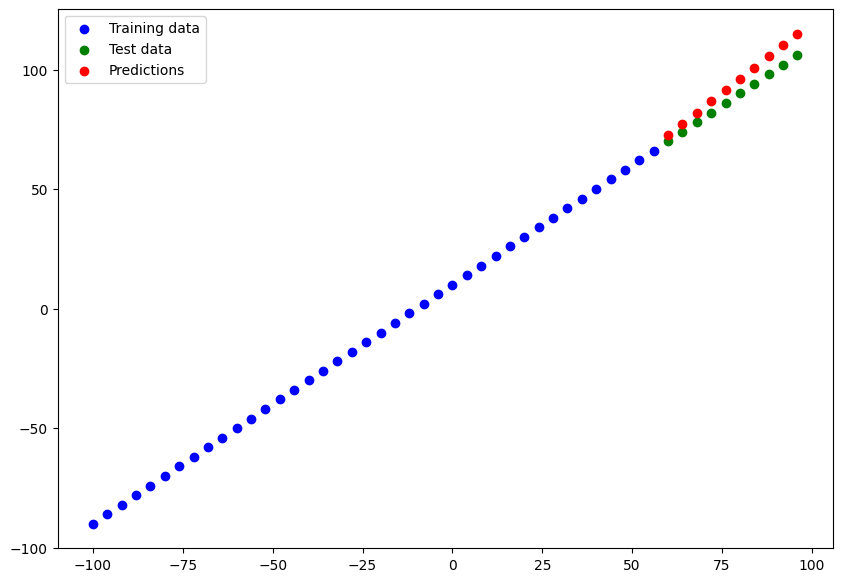

In [44]:
# Make and plot predicitons
y_preds_2 = model.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [45]:
# Calculate model_2 evaluation metrics 
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.718995>,
 <tf.Tensor: shape=(), dtype=float32, numpy=36.945293>)

**Build `model_3`**

In [46]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 14.6873 - mae: 14.6873
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.7708 - mae: 24.7708
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 19.8951 - mae: 19.8951
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 14.3717 - mae: 14.3717
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 16.5671 - mae: 16.5671
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2685 - mae: 11.2685
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 12.3342 - mae: 12.3342
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 10.9996 - mae: 10.9996
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 39.0125 - mae: 39.0125
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 26.5964 - mae: 26.5964
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 21ms/step


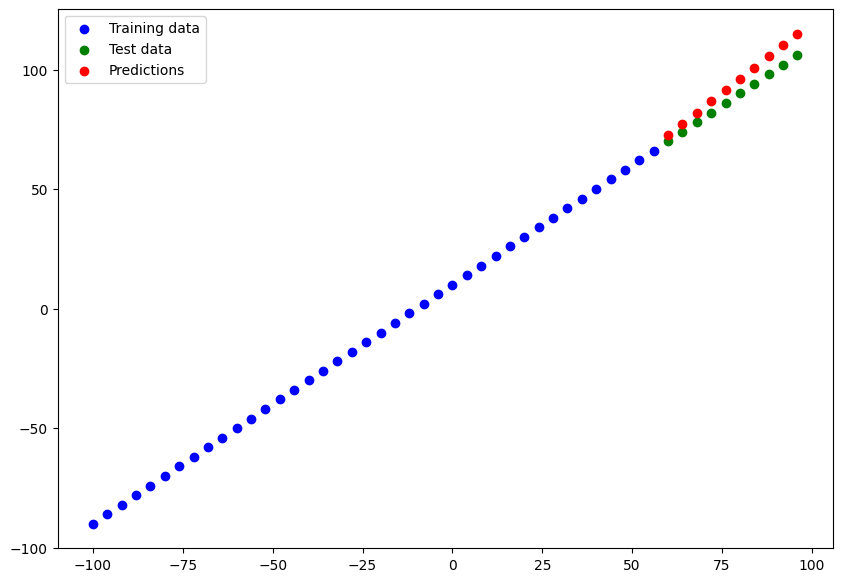

In [47]:
# Make and plot some predictions
y_preds_3 = model.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [48]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=5.718995>,
 <tf.Tensor: shape=(), dtype=float32, numpy=36.945293>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [49]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

result_df = pd.DataFrame(model_results, columns=['model', 'MAE', 'MSE'])
result_df

,model,MAE,MSE
0,model_1,8.557459,79.708061
1,model_2,5.718995,36.945293
2,model_3,5.718995,36.945293


It looks like models 2 and 3 performed the same. Possibly due to some overfitting protector when fitting for a large number of epochs.

In [50]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work an din turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment."

## Tracking you experiments 

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll wnat to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are two main formats we can save our model's to:

1. The SavedModel format
2. The HDF5 format

In [51]:
# Svae model
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f539829e790>, 139997011530000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f539829e790>, 139997011530000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982a6110>, 139997011529920), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982a6110>, 139997011529920), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982ad790>, 139997011532400), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982ad790>, 139997011532400), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982b4cd0>, 139997011532160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982b4cd0>, 139997011532160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f539829e790>, 139997011530000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 10), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f539829e790>, 139997011530000), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982a6110>, 139997011529920), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982a6110>, 139997011529920), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982ad790>, 139997011532400), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(10, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982ad790>, 139997011532400), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982b4cd0>, 139997011532160), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f53982b4cd0>, 139997011532160), {}).


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [52]:
# Save model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model

In [53]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_SavedModel_format.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# Compare model_2 predictions with SavedModel model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [55]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# Check to ensure that loaded model is the same as model_2
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 28ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger Example

In [57]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [58]:
# Read in the insurance dataset
insurance = pd.read_csv('./tensorflow-bootcamp/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
# Let's try to one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [61]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [62]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [63]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [64]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [65]:
# Convert integers to floats-- TensorFlow like floats
X_train = X_train['age'].astype(float)
X_test = X_test['age'].astype(float)

In [66]:
X_train.info()

<class 'pandas.core.series.Series'>
Index: 1070 entries, 560 to 1126
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1070 non-null   float64
dtypes: float64(1)
memory usage: 16.7 KB


In [67]:
# Build a neural network (sort of like model_2 above)

# Set random seed 
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)



Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8522.9629 - mae: 8522.9629
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7554.0063 - mae: 7554.0063
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7255.5088 - mae: 7255.5088
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7259.1743 - mae: 7259.1743
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7505.9575 - mae: 7505.9575
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7353.9170 - mae: 7353.9170
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7316.4316 - mae: 7316.4316
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7467.8955 - mae: 7467.8955
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7349.3970 - mae: 7349.3970
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7450.5625 - mae: 7450.5625

In [68]:
insurance_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7706.1465 - mae: 7706.1465


[7706.146484375, 7706.146484375]

In [70]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [71]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... Let's try and improve it.

To try to improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer.
2. Train for longer

In [72]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13314.8154 - mae: 13314.8154
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13206.8135 - mae: 13206.8135
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12997.3916 - mae: 12997.3916
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12606.7529 - mae: 12606.7529
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11952.5977 - mae: 11952.5977
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 10939.2080 - mae: 10939.2080
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 9561.2393 - mae: 9561.2393
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 8085.5664 - mae: 8085.5664
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7137.6060 - mae: 7137.6060
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6998.8540 - ma

In [73]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6869.7915 - mae: 6869.7915


[6869.79150390625, 6869.79150390625]

In [74]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13290.5830 - mae: 13290.5830
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13156.4805 - mae: 13156.4805
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12910.6631 - mae: 12910.6631
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12471.1240 - mae: 12471.1240
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11756.5732 - mae: 11756.5732
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 10674.7969 - mae: 10674.7969
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 9261.0420 - mae: 9261.0420
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7837.2891 - mae: 7837.2891
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7068.7837 - mae: 7068.7837
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6998.0303 - ma

In [75]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6710.9419 - mae: 6710.9419


[6710.94189453125, 6710.94189453125]

**Question:** How long should you train for?

It depends on the problem you are working on. However, many people have asked this question before... So TensorFlow has a solution, its called the EarlyStopping Callback.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in hte insurance dataframe
insurance = pd.read_csv('./tensorflow-bootcamp/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [80]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']) # One-hot encode categorical data
)

# Create X & y values
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [87]:
# What does our data look like now?
X_train.loc[0], X_train.shape

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 (1070, 6))

In [86]:
X_train_normal.shape

(1070, 11)

Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes.

In [91]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13344.0273 - mae: 13344.0273
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13336.2666 - mae: 13336.2666
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13316.4756 - mae: 13316.4756
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13274.0381 - mae: 13274.0381
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13197.6455 - mae: 13197.6455
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13076.4082 - mae: 13076.4082
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12900.0059 - mae: 12900.0059
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12658.2773 - mae: 12658.2773
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12341.0088 - mae: 12341.0088
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11943.09

Model performed better with scaling as compared to our previous best in `insurance_model_2`

In [92]:
# Evaluate our insurance model trainned on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3440.5552 - mae: 3440.5552


[3440.55517578125, 3440.55517578125]

Cannot evaluate `insurance_model_2` on the same data because it was trained on different data, with different features/columns.

In [95]:
insurance_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               200       
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
X_test_normal_tensor = tf.constant(X_test_normal)